# Research Methods 
## 2012 Olympics Hypothesis Testing

**04. December 2017**

Fabian Karl & Robert Brown


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import stats
import scipy.optimize as opt

import edward as ed
from edward.models import Normal

import matplotlib.pyplot as plt

pd.options.display.max_columns = 2000

%matplotlib inline

In [2]:
df = pd.read_csv('london-2012.csv', thousands=',')
df = df.drop(['Unnamed: 44'], axis=1)
df.head(10)

,ISO,GDP.2011,pop.2010,Country name,NOC,F.2012,M.2012,NOC SIZE,NOC.Size.Per.100K.pop,Gold,Silver,Bronze,Total,Bronze.Per.100K.pop,Silver.Per.100K.pop,Gold.Per.100K.pop,Total.Per.100K.pop,Bronze.Per.1BN.GDP,Silver.Per.1BN.GDP,Gold.Per.1BN.GDP,Total.Per.1BN.GDP,Bronze.Per.Athlete,Silver.Per.Athlete,Gold.Per.Athlete,Total.Per.Athlete,Bronze.pop,Silver.pop,Gold.pop,Total.pop,Bronze.GDP,Silver.GDP,Gold.GDP,Total.GDP,Bronze.Athlete,Silver.Athlete,Gold.Athlete,Total.Athlete,GDP rank score,Population rank score,Athlete rank score,Official medal ranking,GDP rank,Pop rank,Team size rank,"Total medal score (gold=3, silver =2, bronze=1)",Model-based score,Model-based rank
0,AFG,2.034346e+10,34385000,Afghanistan,AFG,1,5,6,0.017449,0,0,1,1,0.002908,0.000000,0.000000,0.002908,0.049156,0.000000,0.000000,0.049156,0.166667,0.000000,0.000000,0.166667,0.4,0.0,0.0,0.4,5.53,0.00,0.00,5.53,17.72,0.00,0.00,17.72,5.53,0.4,17.72,79,45,82,39,1,-0.725821,107
1,ALB,1.295956e+10,3205000,Albania,ALB,4,7,11,0.343214,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-1.173997,125
2,DZA,1.886810e+11,35468000,Algeria,ALG,18,21,39,0.109958,1,0,0,1,0.000000,0.000000,0.002819,0.002819,0.000000,0.000000,0.005300,0.005300,0.000000,0.000000,0.025641,0.025641,0.0,0.0,0.3,0.3,0.00,0.00,0.54,0.54,0.00,0.00,4.23,4.23,1.62,0.9,12.69,58,68,78,58,3,-5.829173,169
3,ASM,5.370000e+08,68420,American Samoa,ASA,1,4,5,7.307805,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-0.104260,56
4,AND,3.491000e+09,84864,Andorra,AND,2,4,6,7.070136,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-0.412898,90
5,AGO,1.009900e+11,19082000,Angola,ANG,30,5,35,0.183419,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-5.505927,167
6,ATG,1.128709e+09,88000,Antigua and Barbuda,ANT,2,3,5,5.681818,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-0.180710,67
7,ARG,4.459890e+11,40412000,Argentina,ARG,43,99,142,0.351381,1,1,2,4,0.004949,0.002475,0.002475,0.009898,0.004484,0.002242,0.002242,0.008969,0.014085,0.007042,0.007042,0.028169,0.7,0.4,0.3,1.4,0.50,0.34,0.23,1.07,1.50,0.91,1.16,3.57,1.87,2.4,6.80,43,64,65,76,7,-9.630904,184
8,ARM,1.024779e+10,3092000,Armenia,ARM,4,21,25,0.808538,0,1,2,3,0.064683,0.032342,0.000000,0.097025,0.195164,0.097582,0.000000,0.292746,0.080000,0.040000,0.000000,0.120000,9.3,5.3,0.0,14.6,21.94,14.64,0.00,36.58,8.50,5.17,0.00,13.67,51.22,19.9,18.84,53,8,29,37,4,3.012326,30
9,ABW,2.456000e+09,108000,Aruba,ARU,1,3,4,3.703704,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,0,-0.320914,82


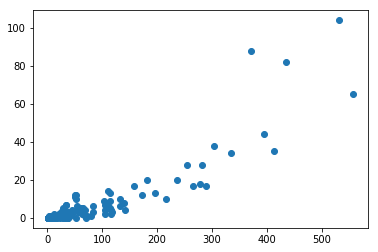

In [3]:
fig, ax = plt.subplots()
ax.scatter(df['NOC SIZE'], df['Total'])

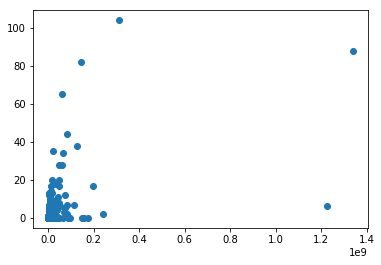

In [4]:
fig, ax = plt.subplots()
ax.scatter(df['pop.2010'], df['Total'])

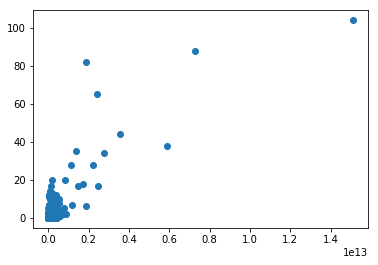

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['GDP.2011'], df['Total'])

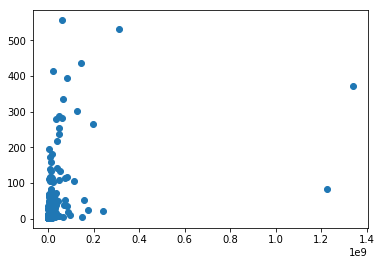

In [6]:
fig, ax = plt.subplots()
ax.scatter(df['pop.2010'], df['NOC SIZE'])

In [7]:
rows = df.median().index

def centeral_limit_theorem_samples(split_with, N = 30, M = 1000):
    median = df[split_with].median()
    below = df[df[split_with] <= median]
    above = df[df[split_with] > median]

    samples = {'above':[], 'below':[]}
    for _ in range(M):
        samples['above'].append(above.sample(N).mean())
        samples['below'].append(below.sample(N).mean())
        
    mu = {'above':{}, 'below':{}}
    for row in rows:
        mu['above'][row] = map(lambda x: x[row], samples['above'])
        mu['below'][row] = map(lambda x: x[row], samples['below'])
    return samples, mu

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


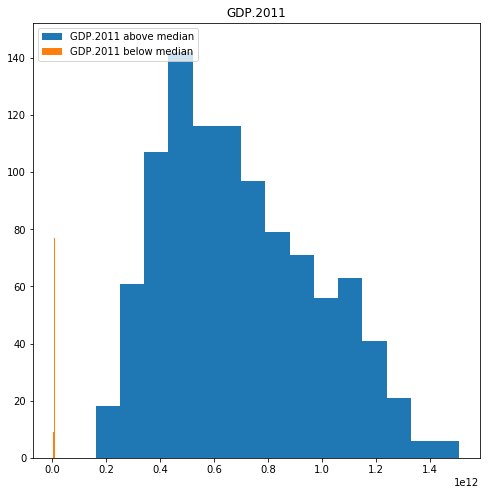

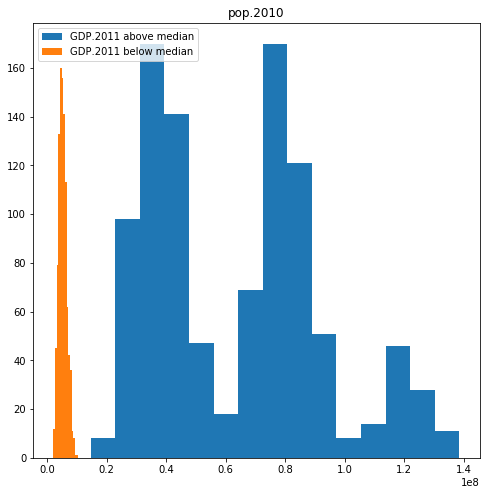

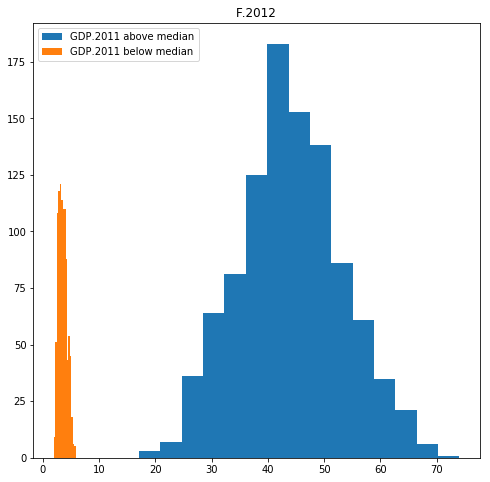

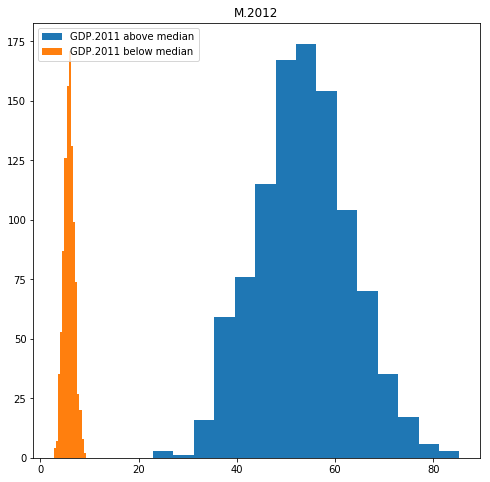

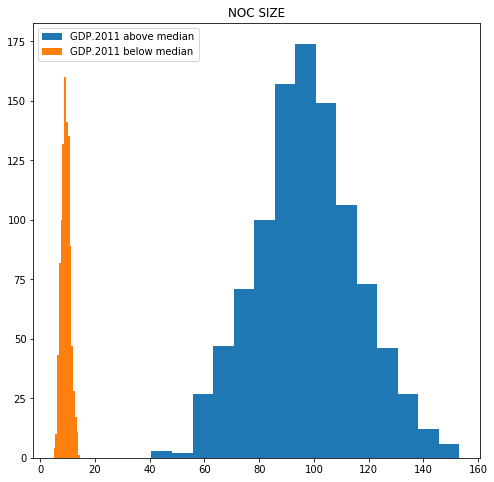

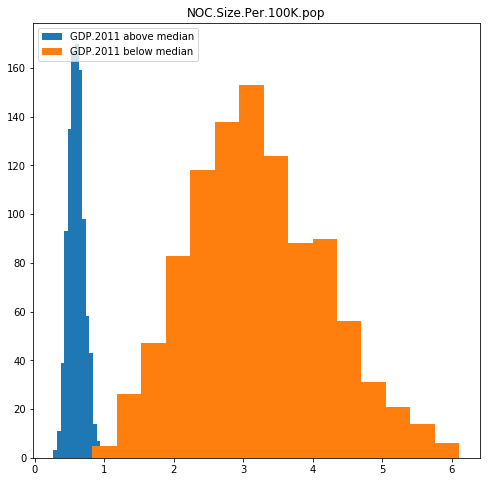

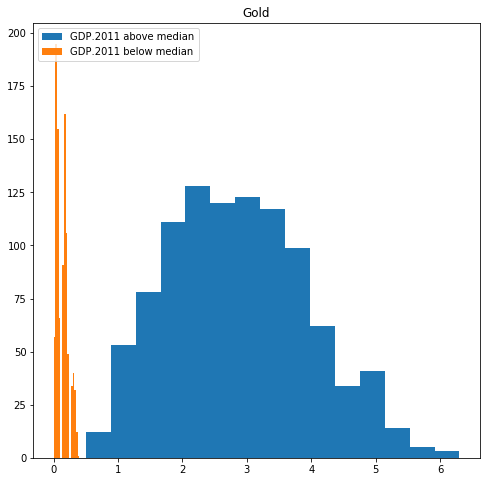

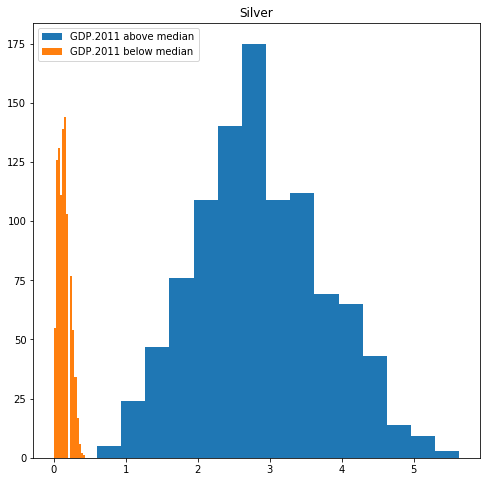

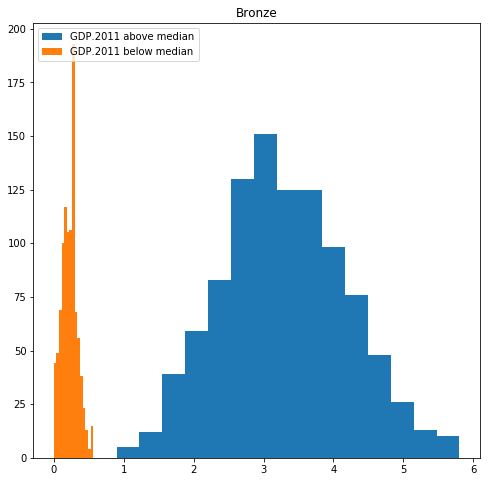

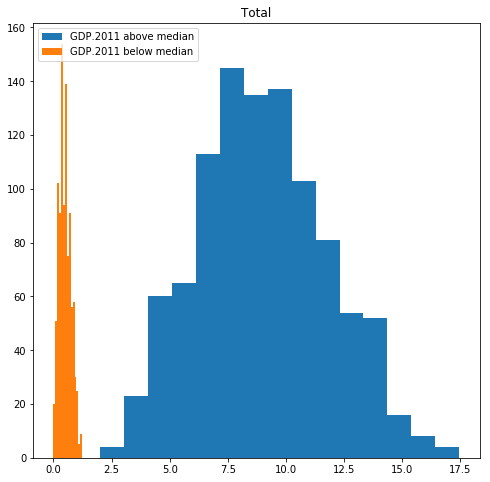

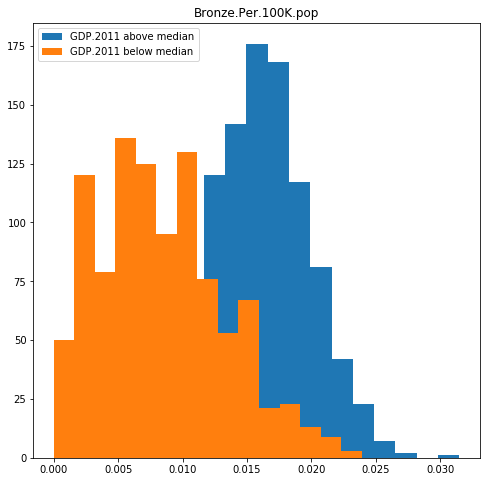

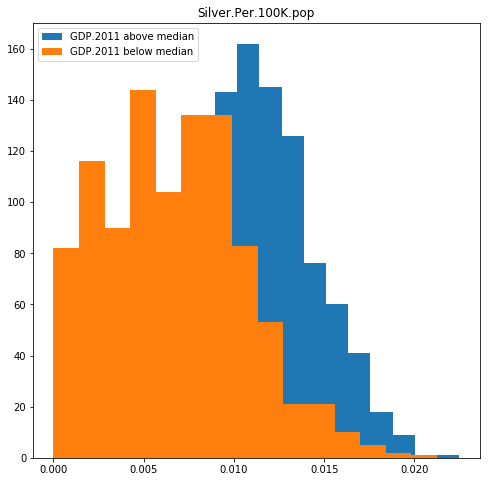

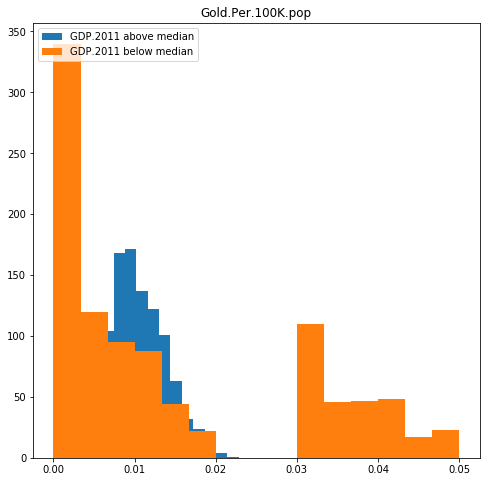

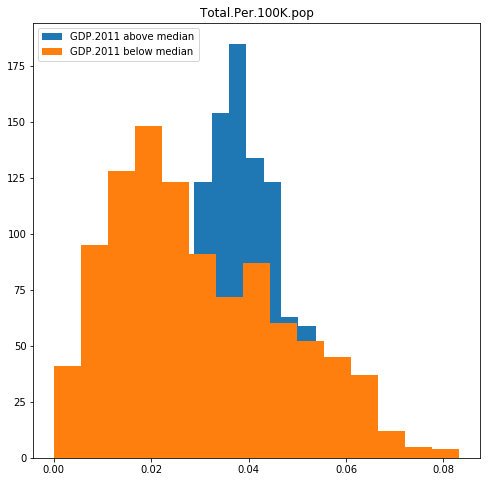

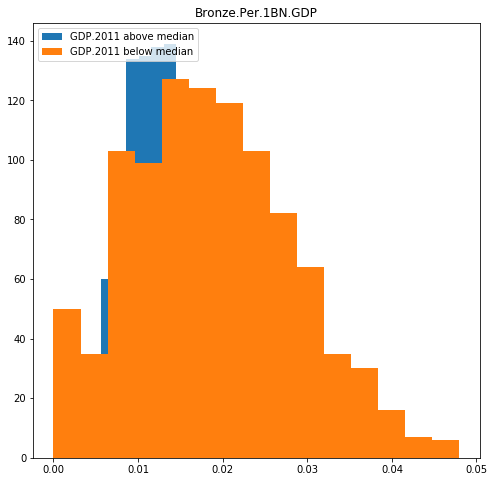

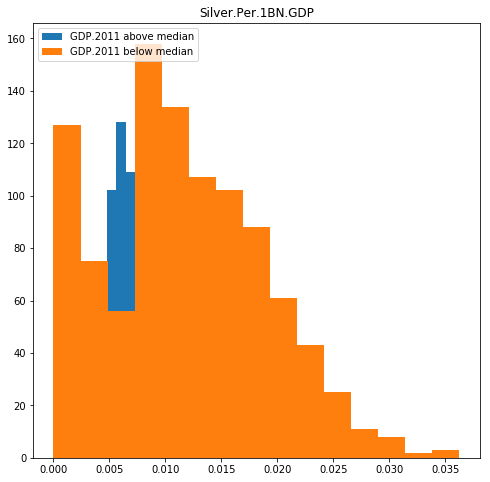

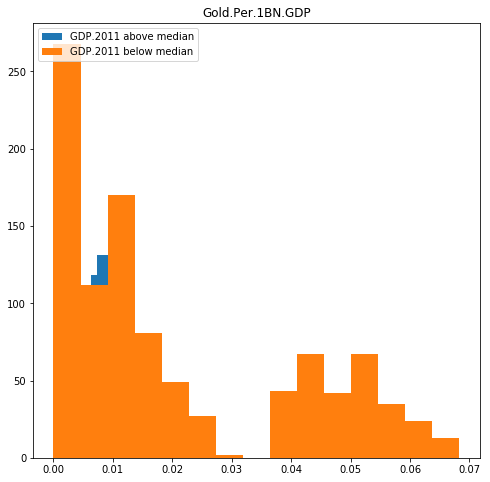

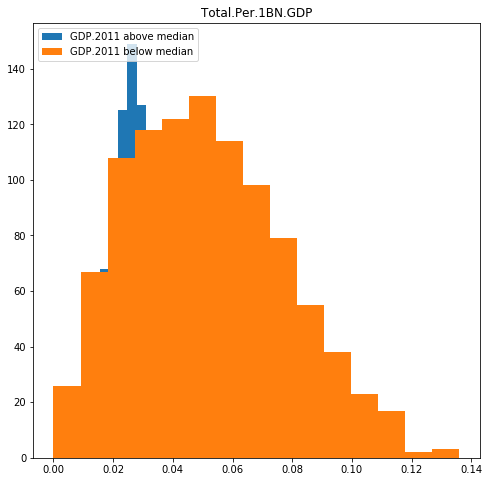

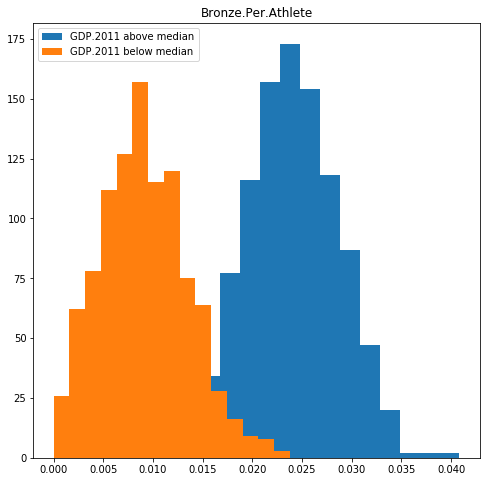

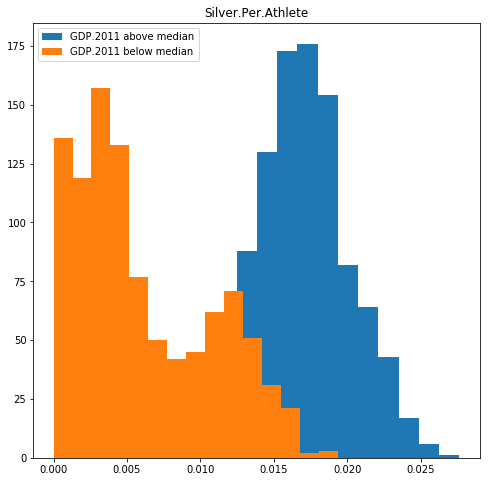

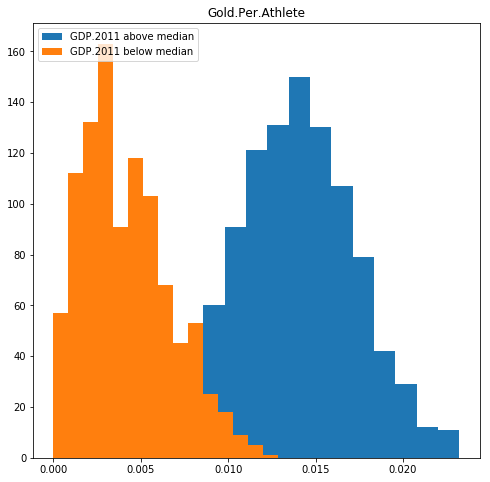

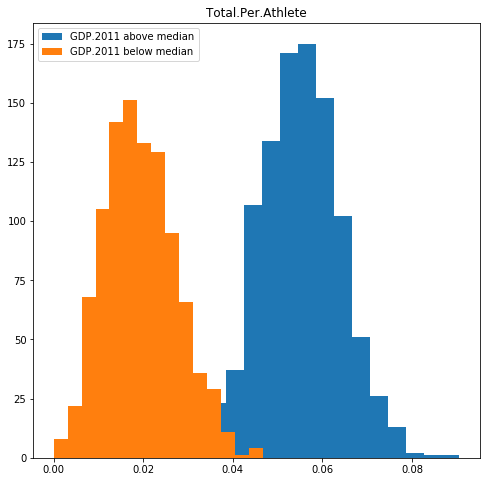

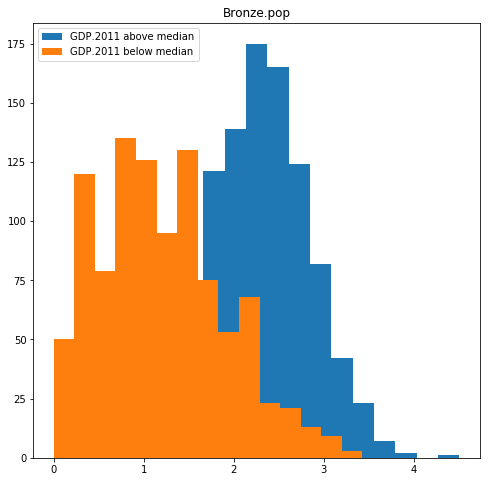

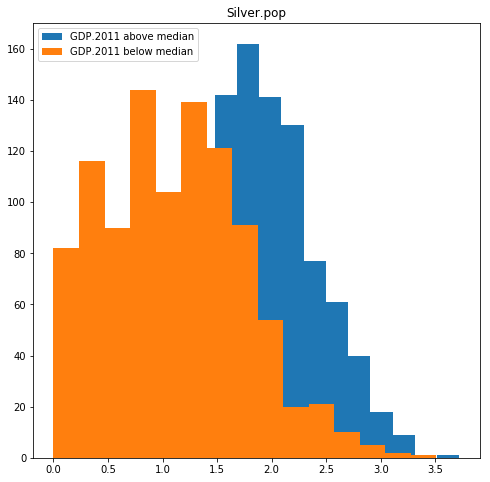

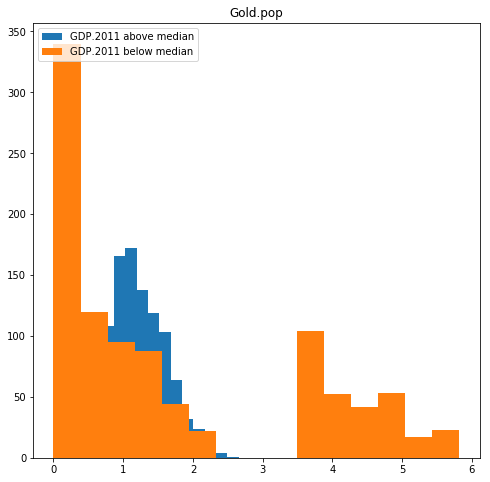

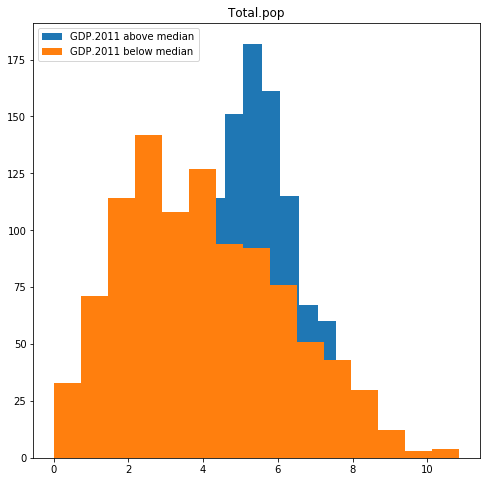

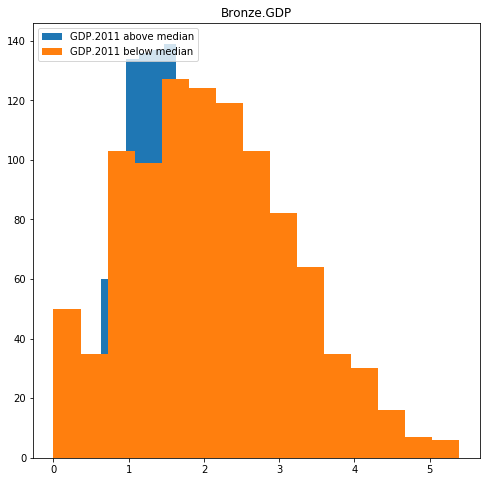

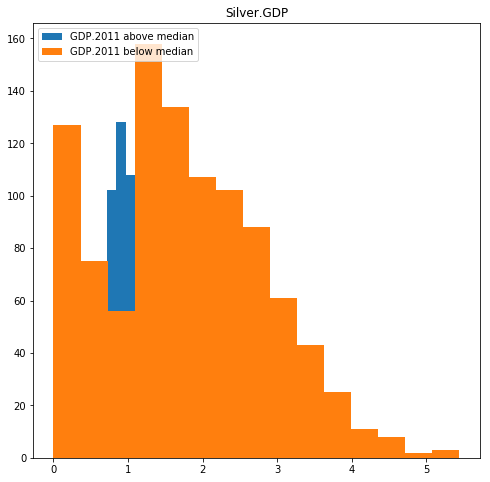

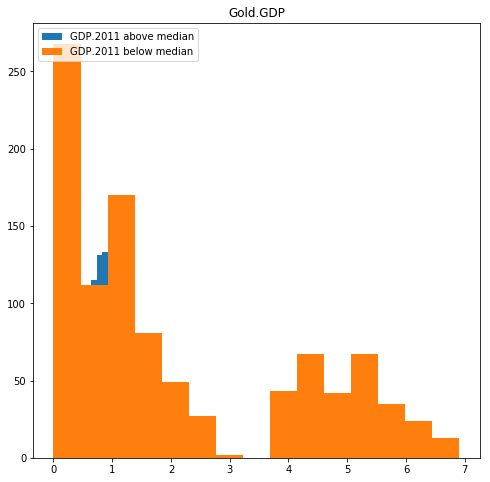

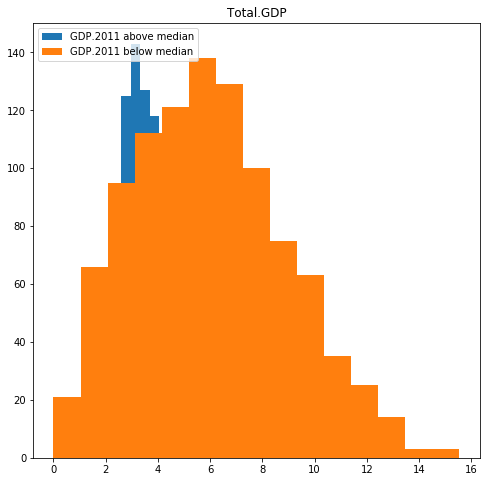

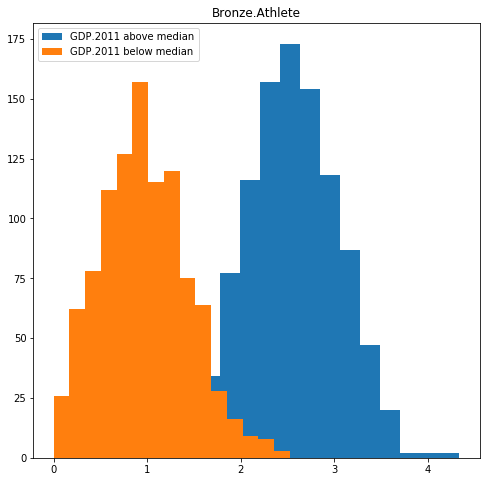

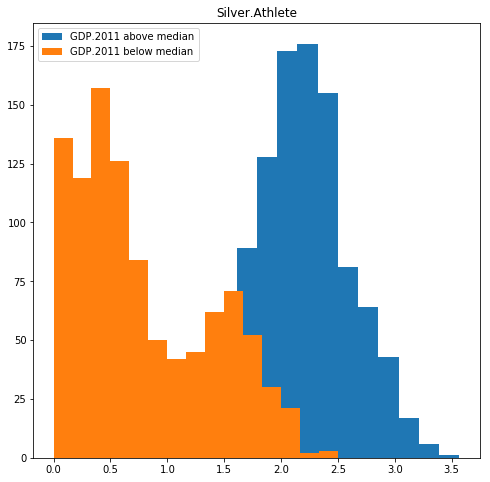

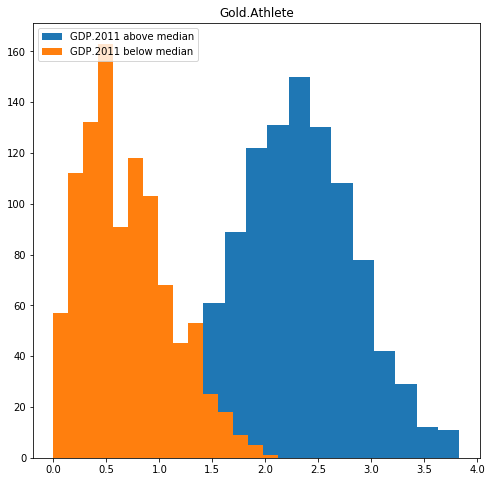

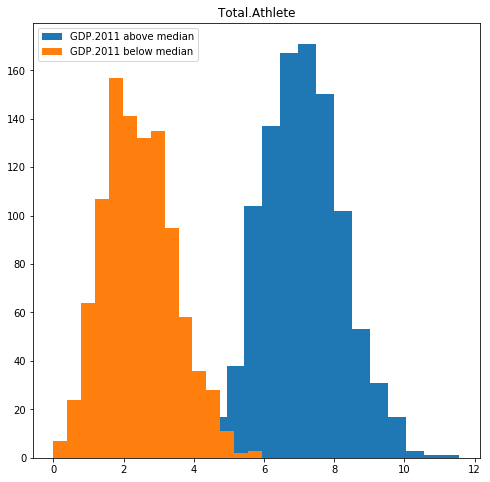

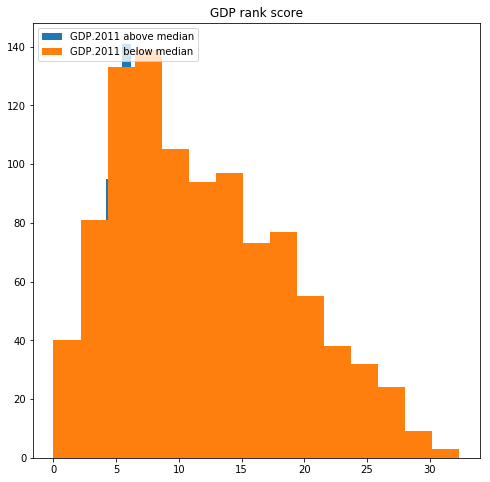

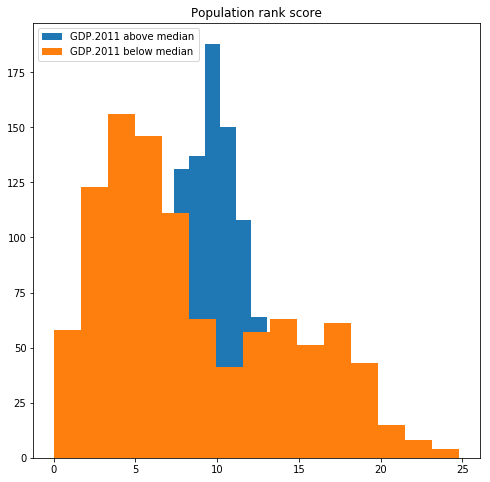

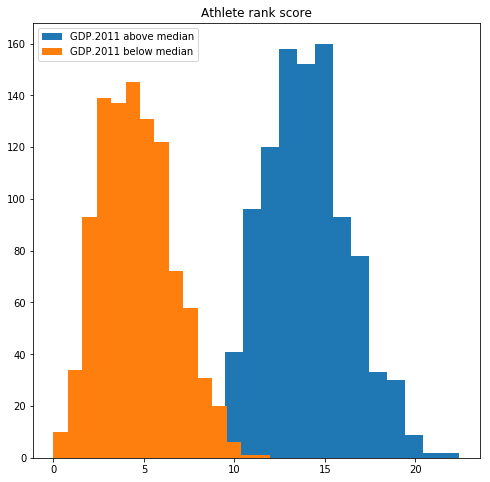

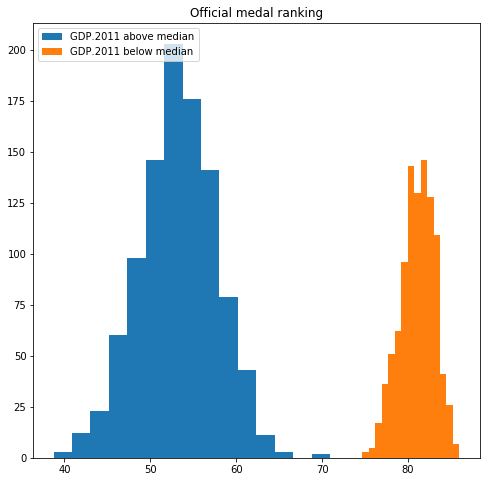

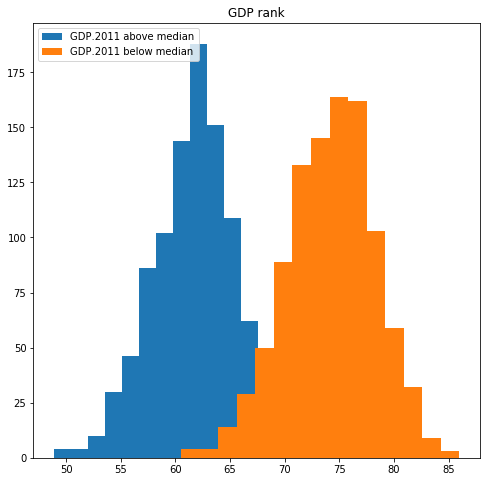

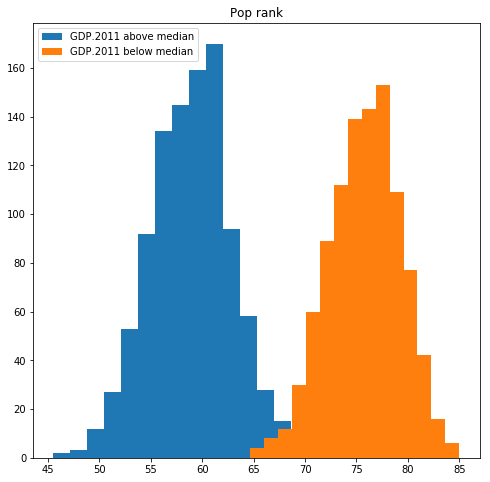

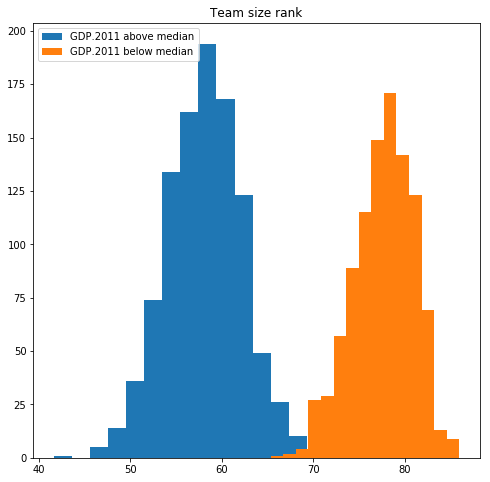

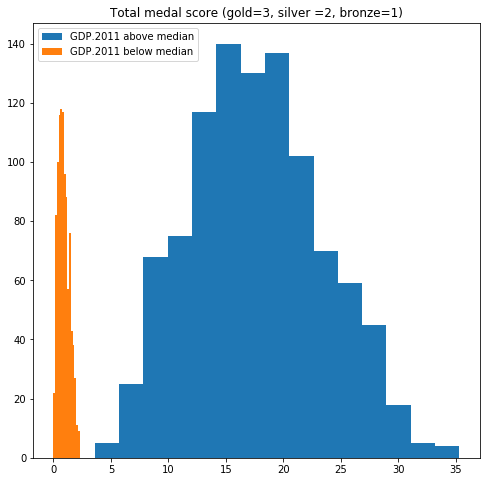

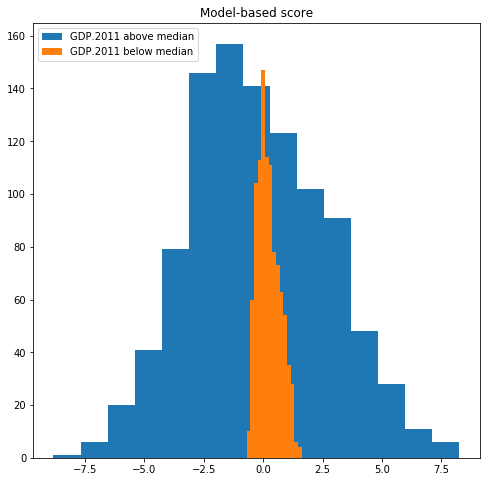

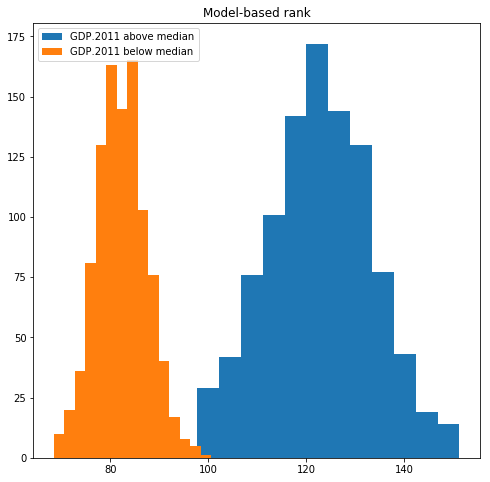

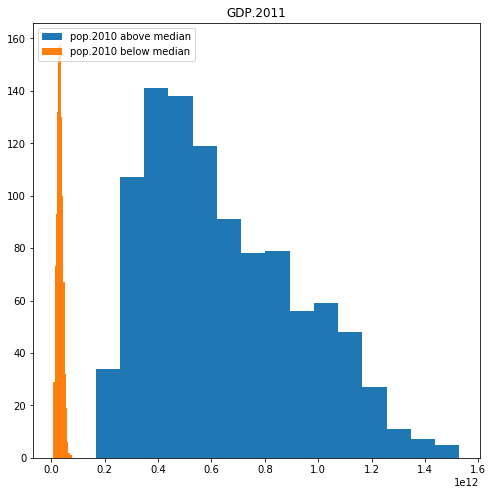

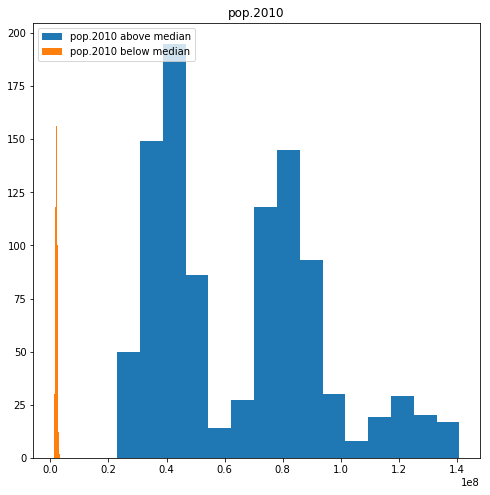

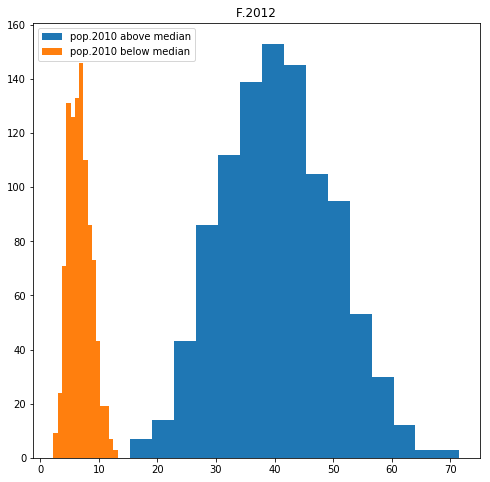

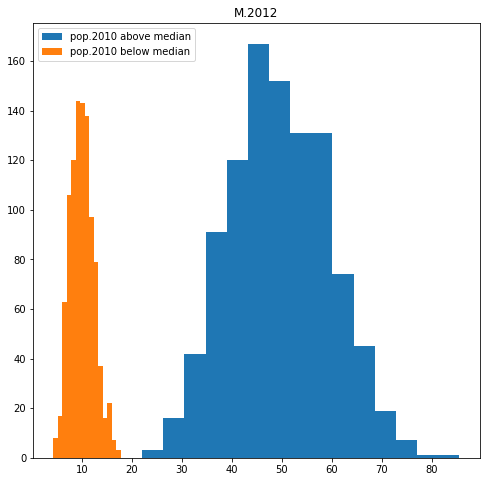

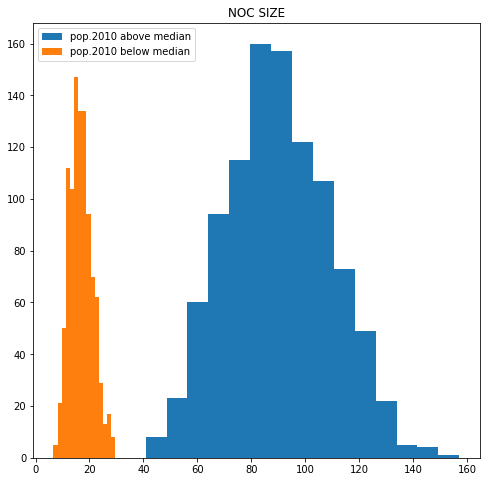

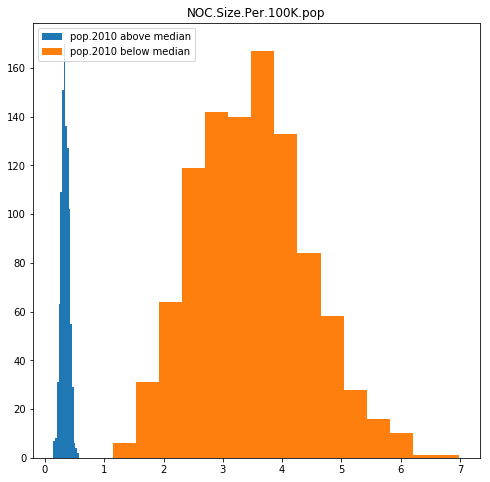

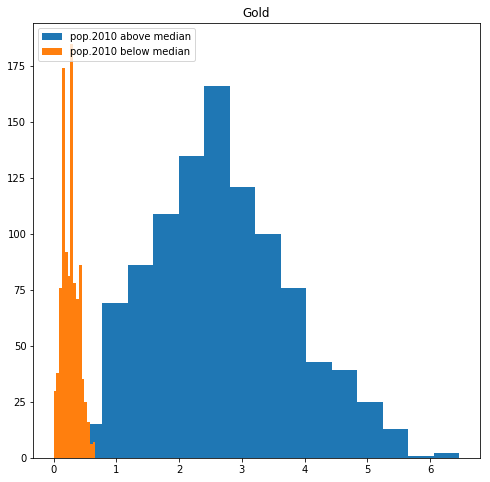

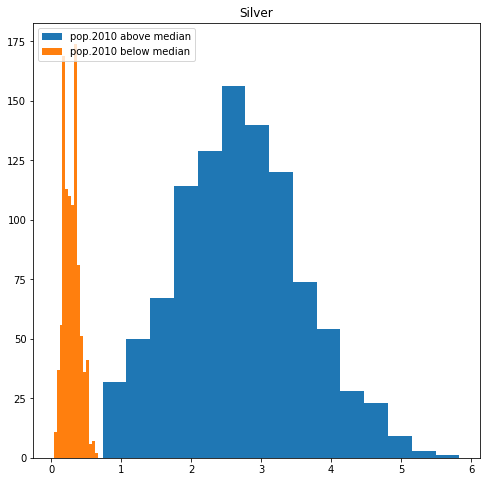

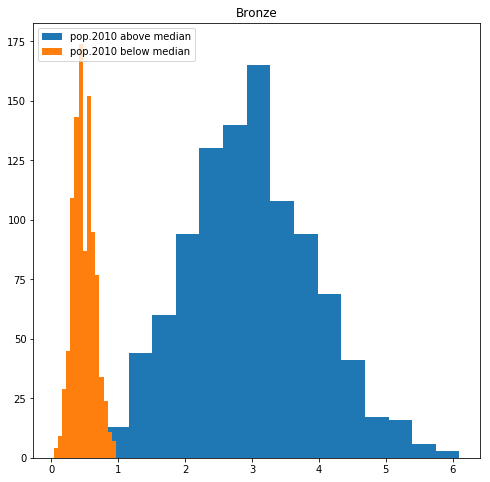

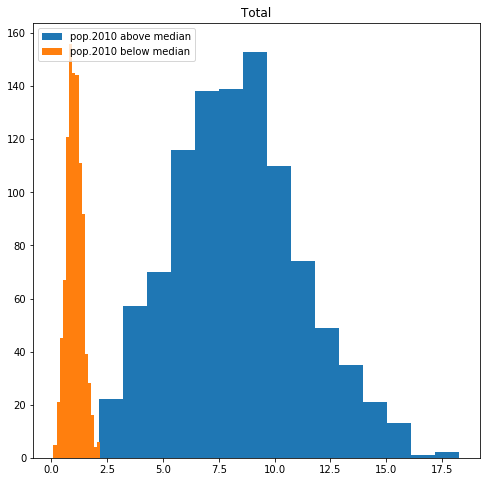

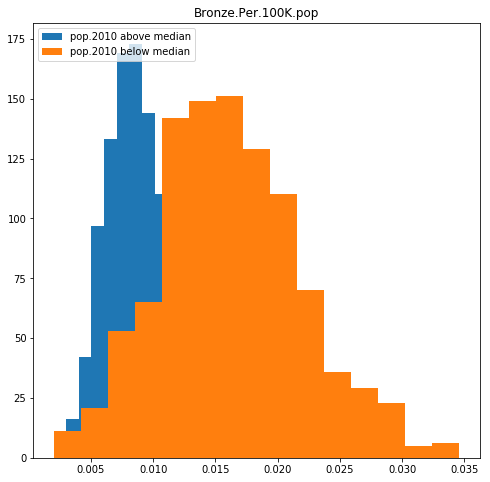

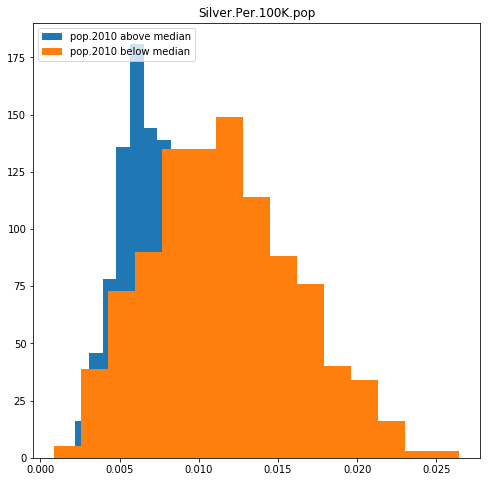

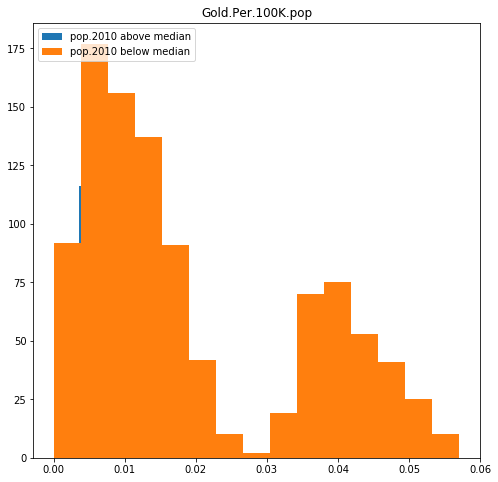

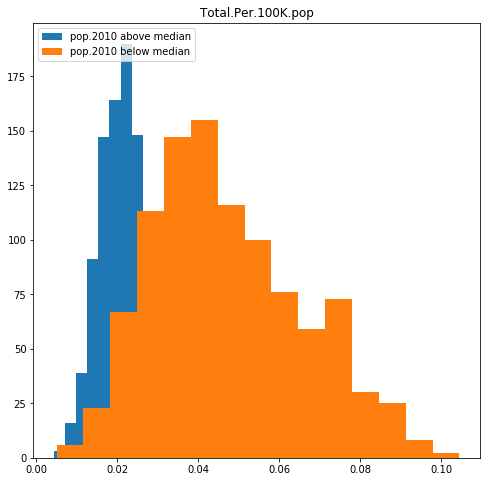

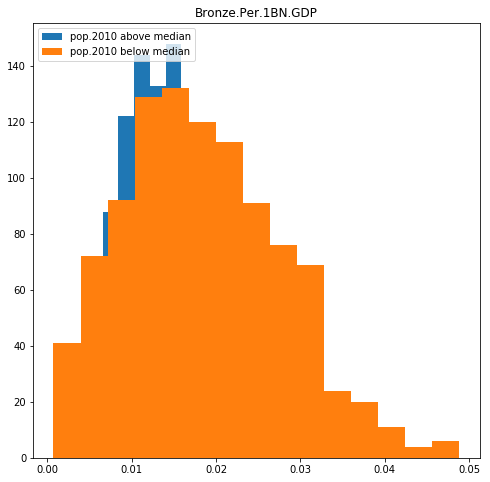

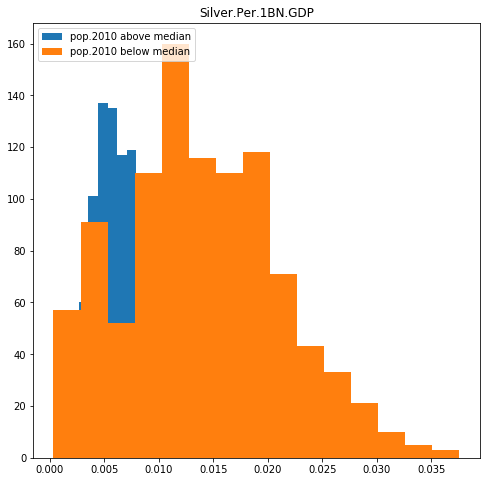

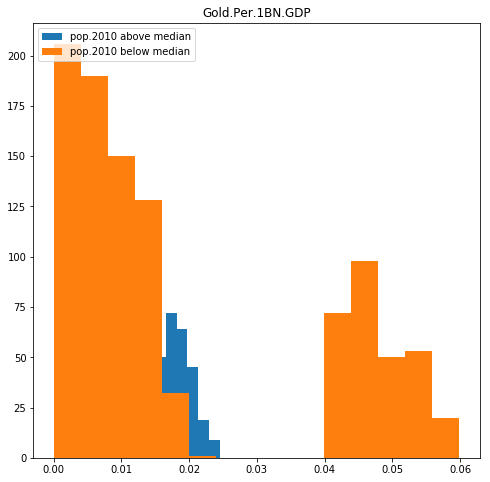

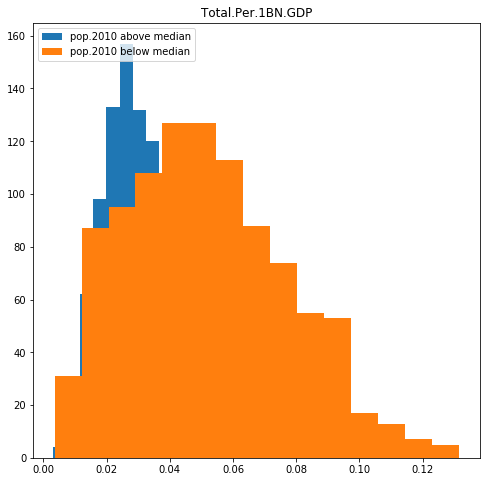

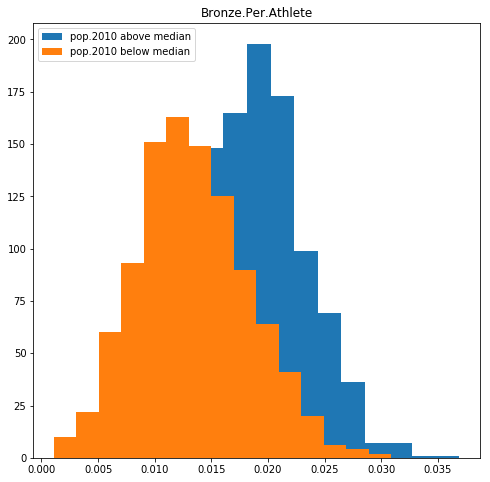

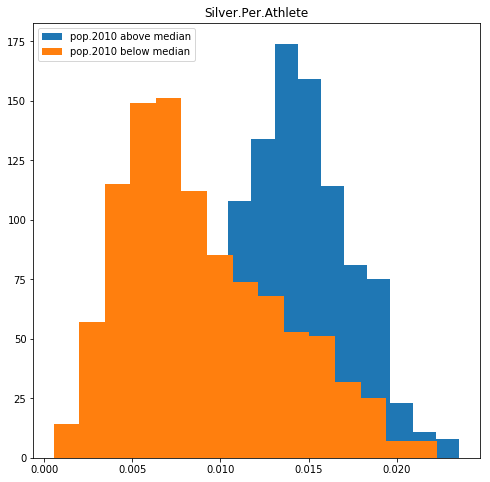

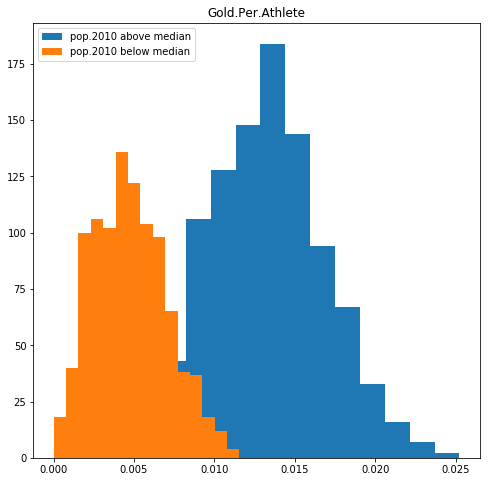

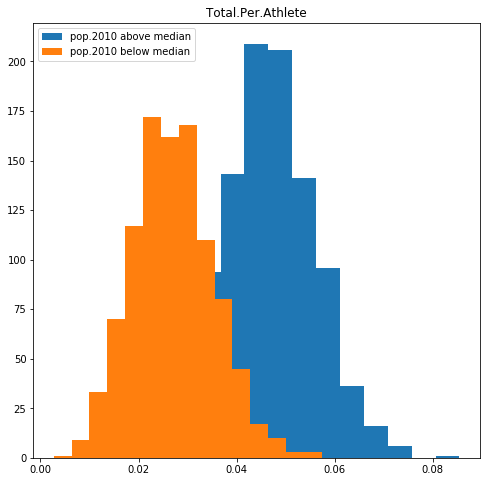

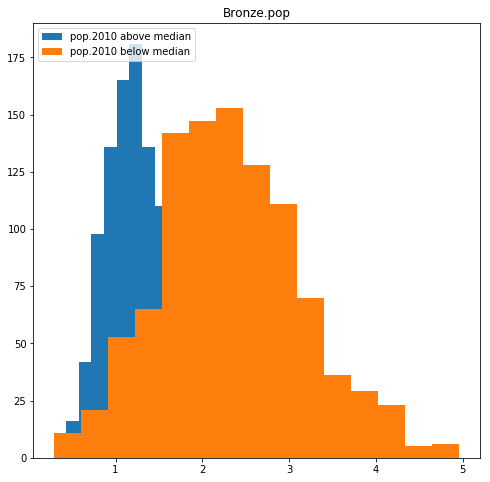

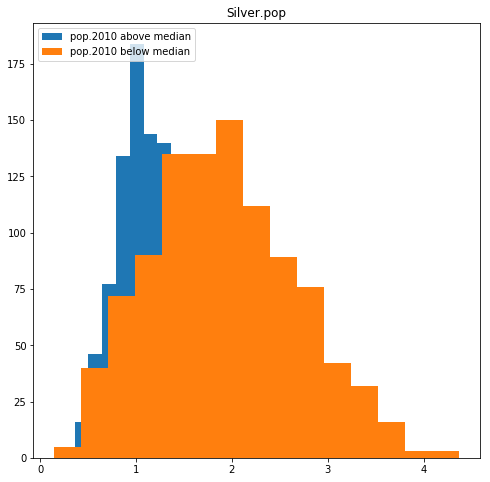

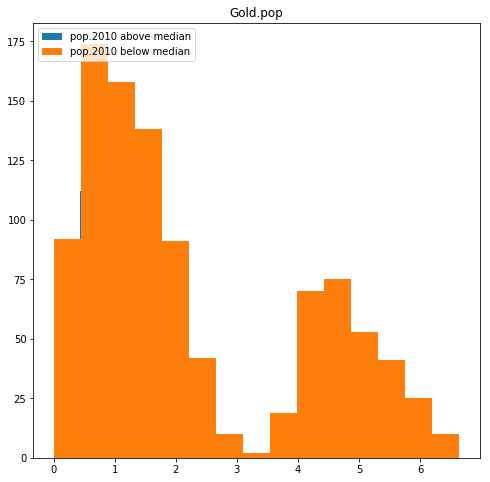

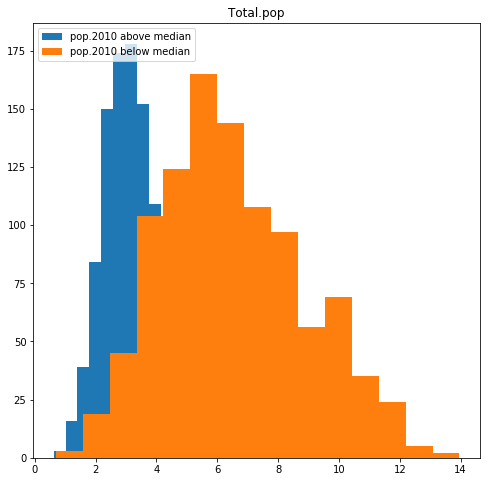

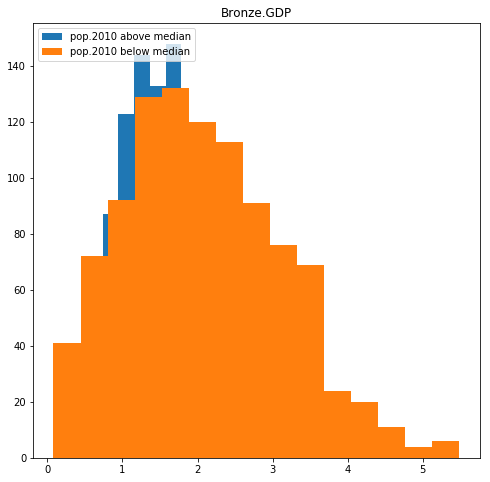

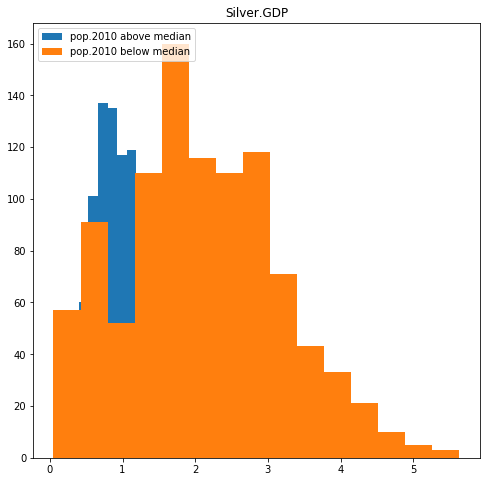

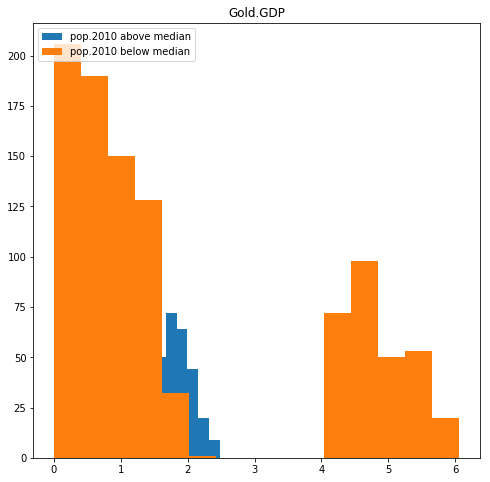

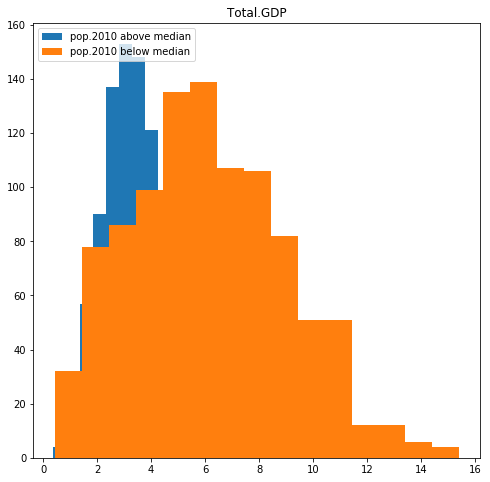

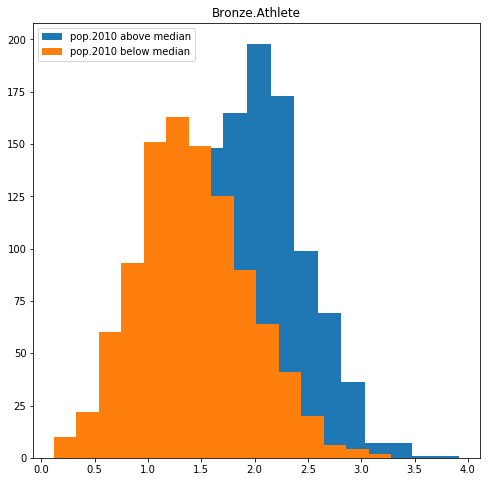

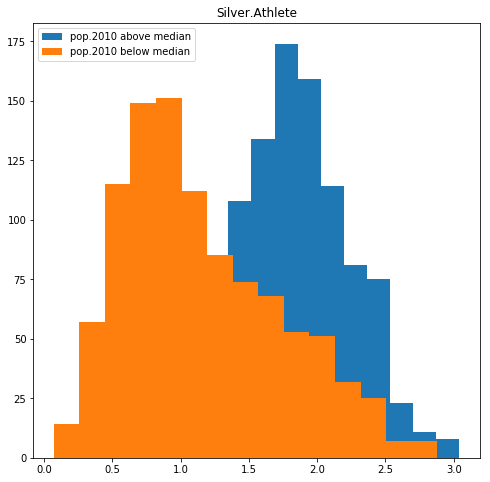

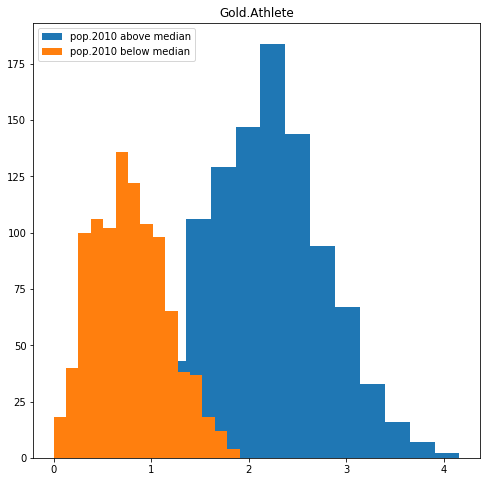

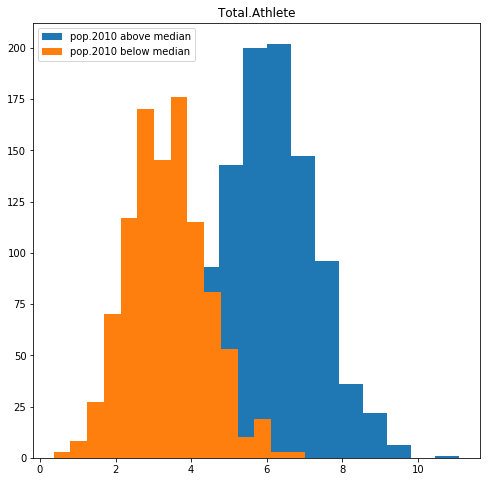

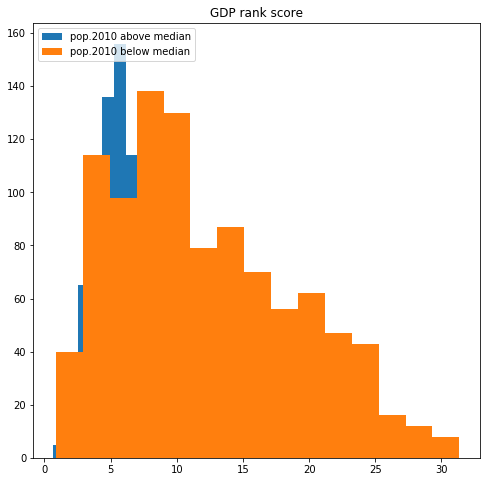

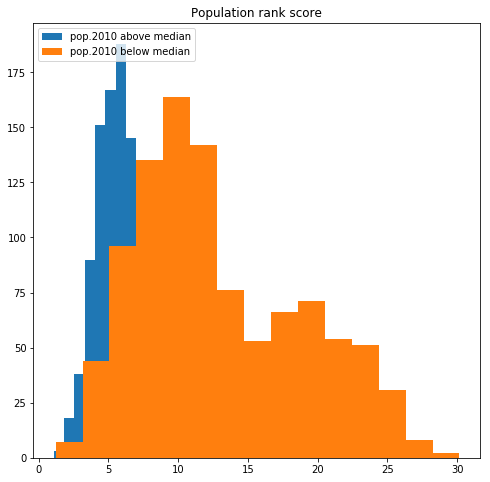

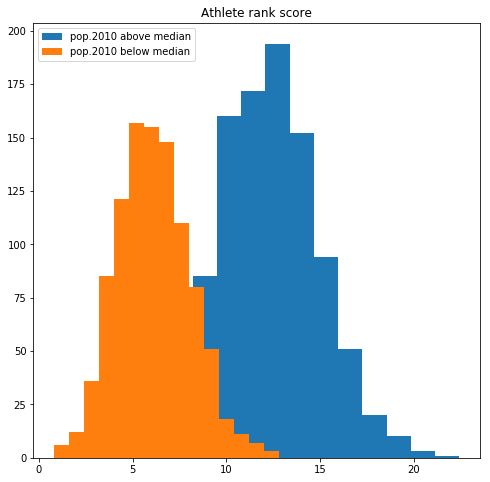

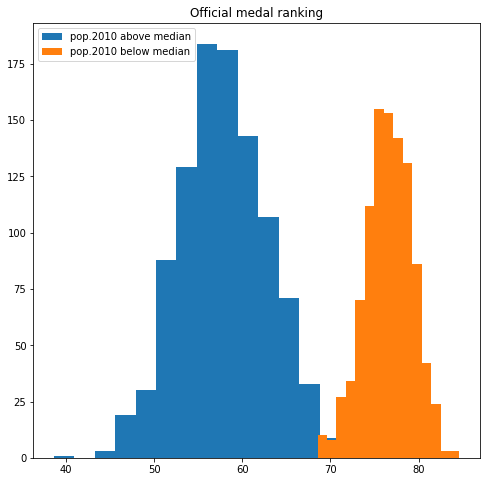

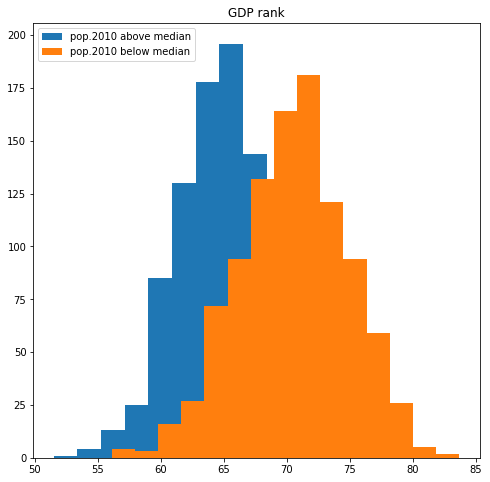

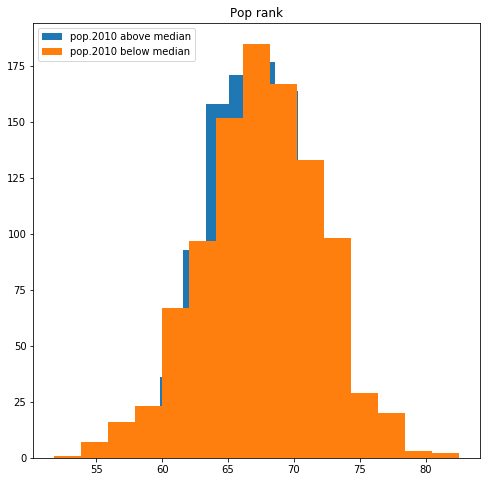

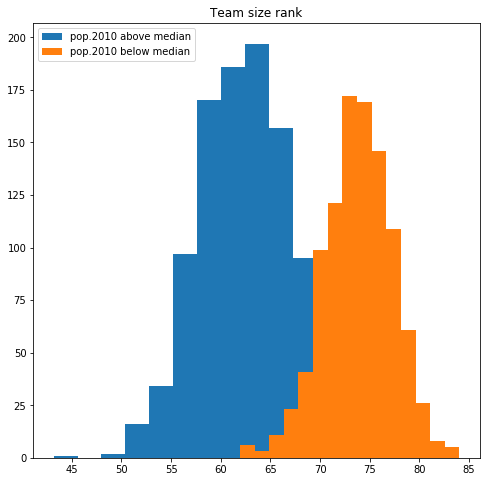

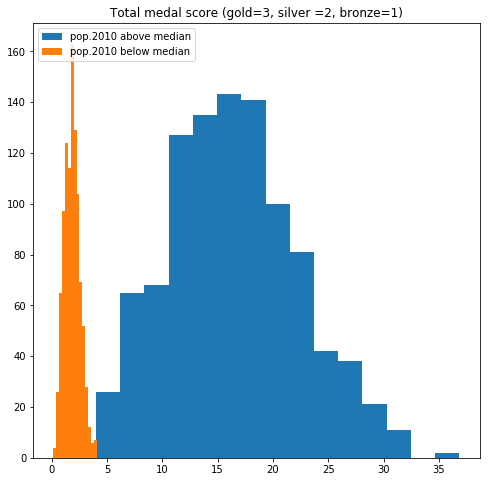

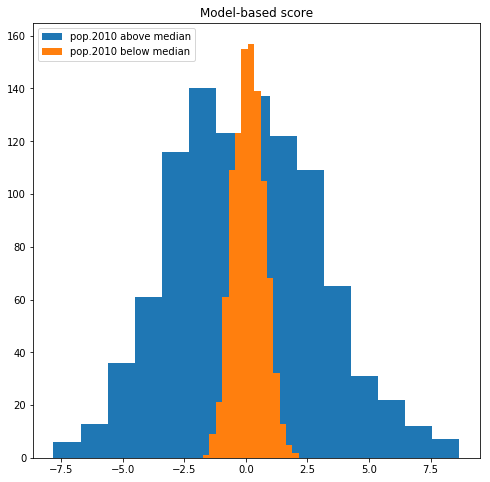

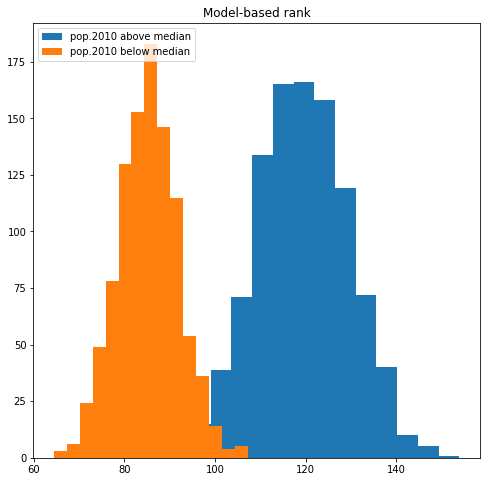

In [8]:
for split_condition in ['GDP.2011', 'pop.2010']:
    (samples, mu) = centeral_limit_theorem_samples(split_condition)
    for row in rows:
        fig = plt.figure(figsize=(8, 8))
        axes = fig.add_subplot(111)
        axes.hist(mu['above'][row], bins=15, label = '{0} above median'.format(split_condition));
        axes.hist(mu['below'][row], bins=15, label = '{0} below median'.format(split_condition));
        axes.set_title(row)
        axes.legend(loc=2);

bayesian nonsense

In [9]:
n = 40000

sigma = 1.0
sigma0 = 3.0

tau = 1.0/sigma**2
tau0 = 1.0/sigma0**2

N = tf.placeholder(tf.int32, shape=())
mu = Normal(tf.constant(0.0), tf.constant(sigma0)).sample(N)
x = Normal(mu, tf.constant(sigma))

with tf.Session() as sess:
    #samples = [sess.run(x.value()) for _ in range(n)]
    #samples = sess.run(x.sample(n)) # samples 1 value for mu, and uses it for every sample of x...wtf
    samples = sess.run(x, {N: n})

https://github.com/blei-lab/edward/issues/759

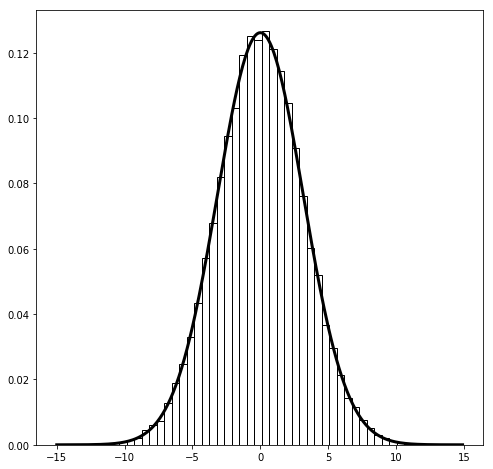

In [10]:
fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(111)
axes.hist(samples, bins=50, normed=True, color = 'grey', fill = False)

x_range = np.arange(-15, 15, 0.1)
x_precision = tau * tau0 / (tau + tau0)
axes.plot(x_range, stats.norm.pdf(x_range, 0, 1 / np.sqrt(x_precision)), color='k', linewidth=3);

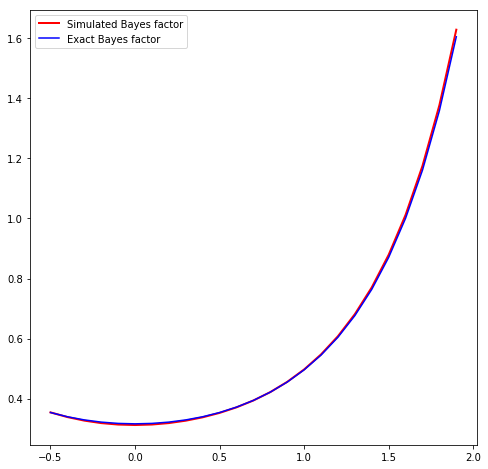

In [11]:
x_pdf = stats.kde.gaussian_kde(samples)

def bayes_factor_sim(x_obs):
    return x_pdf.evaluate(x_obs) / stats.norm.pdf(x_obs, 0, sigma)

def bayes_factor_exact(x_obs):
    return np.sqrt(tau0 / (tau + tau0)) * np.exp(0.5 * tau**2 / (tau + tau0) * x_obs**2)

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(111)
x_range = np.arange(-0.5, 2, 0.1)
axes.plot(x_range, bayes_factor_sim(x_range), color="red", label="Simulated Bayes factor", linewidth=2)
axes.plot(x_range, bayes_factor_exact(x_range), color="blue", label="Exact Bayes factor")
axes.legend(loc=2);